#📌 Extracão

In [236]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Leitura do Json

In [237]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


### Normalizar oos dados aninhados

In [238]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])
df_final = pd.concat([df[['customerID','Churn']],df_customer, df_phone, df_internet, df_account], axis=1)
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

###Limpeza dos dados

In [239]:
df_final['Contract'] = df_final['Contract'].str.replace('-', '', regex=True)
df_final['PaymentMethod'] = df_final['PaymentMethod'].str.replace('(automatic)', '', regex=True)
df_final['PaymentMethod'] = df_final['PaymentMethod'].str.replace('[()]', '', regex=True)
df_final['Charges.Total'] = df_final['Charges.Total'].apply(
    lambda x: float(str(x).replace(' ', '')) if str(x).strip() != '' else 0.0
)
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Monthtomonth,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Monthtomonth,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Monthtomonth,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Monthtomonth,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Monthtomonth,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Monthtomonth,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [240]:
# Remover valores nulos do Churn
# Identifica o valor que está causando o problema
valores_a_remover = df_final[~df_final['Churn'].isin(['Yes', 'No'])]['Churn'].unique()

# Filtra o DataFrame para manter apenas as linhas com 'Yes' ou 'No'
df_final = df_final[df_final['Churn'].isin(['Yes', 'No'])].copy()
print(df_final['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [241]:
num_duplicados = df_final.duplicated().sum
print(f"\n Registros duplicados no dataset: {num_duplicados}")


 Registros duplicados no dataset: <bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
7262    False
7263    False
7264    False
7265    False
7266    False
Length: 7043, dtype: bool>


In [242]:
print("\n Informações gerais:")
df_final.info()


 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 no

In [243]:
print("\n Valores únicos por coluna:")
for i in df_final.columns:
    print(f"{i}: {df_final[i].nunique()} valores únicos")


 Valores únicos por coluna:
customerID: 7043 valores únicos
Churn: 2 valores únicos
gender: 2 valores únicos
SeniorCitizen: 2 valores únicos
Partner: 2 valores únicos
Dependents: 2 valores únicos
tenure: 73 valores únicos
PhoneService: 2 valores únicos
MultipleLines: 3 valores únicos
InternetService: 3 valores únicos
OnlineSecurity: 3 valores únicos
OnlineBackup: 3 valores únicos
DeviceProtection: 3 valores únicos
TechSupport: 3 valores únicos
StreamingTV: 3 valores únicos
StreamingMovies: 3 valores únicos
Contract: 3 valores únicos
PaperlessBilling: 2 valores únicos
PaymentMethod: 4 valores únicos
Charges.Monthly: 1585 valores únicos
Charges.Total: 6531 valores únicos


In [244]:
print("\n Valores ausentes por coluna:")
df_final.isnull().sum()


 Valores ausentes por coluna:


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#📊 Carga e análise

In [245]:
print("Análise Descritiva \n")
df_final.describe()

Análise Descritiva 



,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [246]:
df_final['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


In [247]:
# Contagem de clientes que não tiveram churn ('No') e não usam OnlineSecurity ('No')
count = df_final[(df_final['Churn'] == 'No') & (df_final['OnlineSecurity'] == True)].shape[0]

print(f"Número de clientes com Churn 'No' e OnlineSecurity 'No': {count}")

Número de clientes com Churn 'No' e OnlineSecurity 'No': 0


/tmp/ipython-input-1510974928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='Churn', palette='viridis')


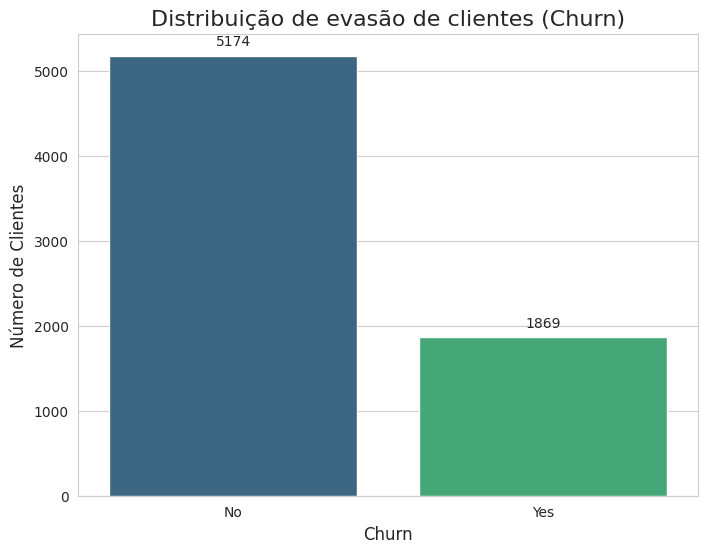

In [248]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_final, x='Churn', palette='viridis')

plt.title('Distribuição de evasão de clientes (Churn)', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points')

plt.show()

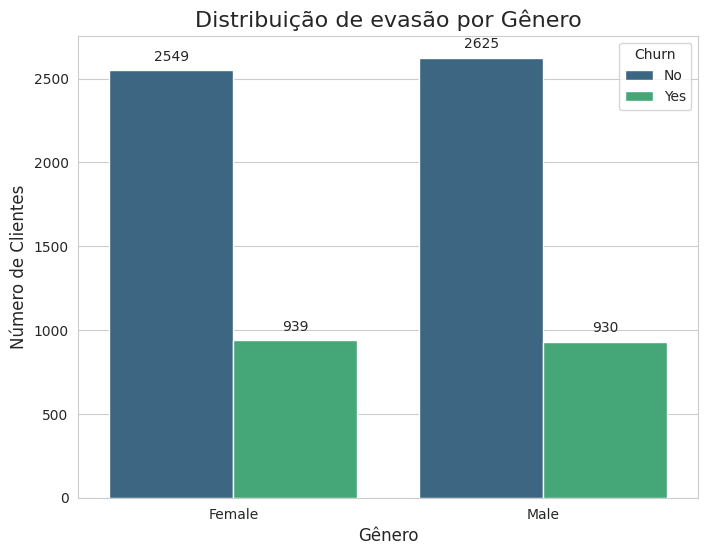

In [249]:

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_final, x='gender', hue='Churn', palette='viridis')

plt.title('Distribuição de evasão por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', loc='upper right')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Verifica se a altura da barra é maior que zero
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

plt.show()

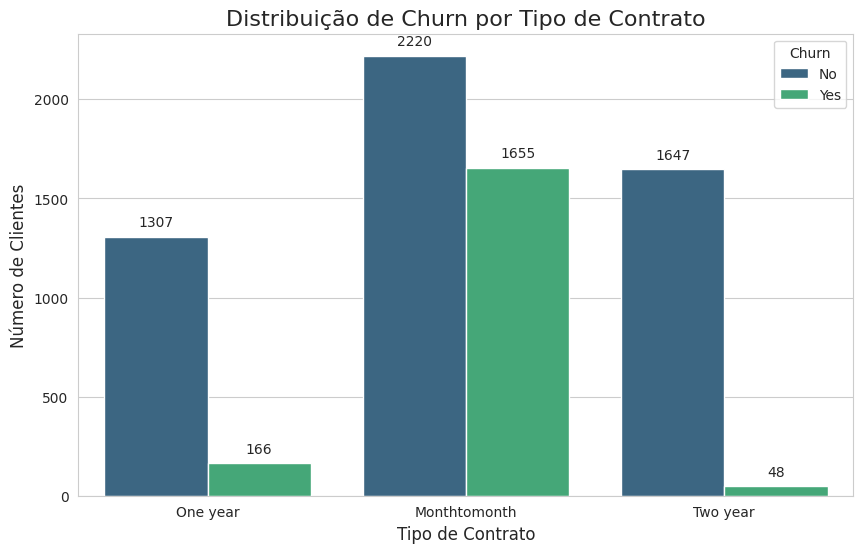

In [250]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='Contract', hue='Churn', palette='viridis')

plt.title('Distribuição de Churn por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', loc='upper right')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

plt.show()

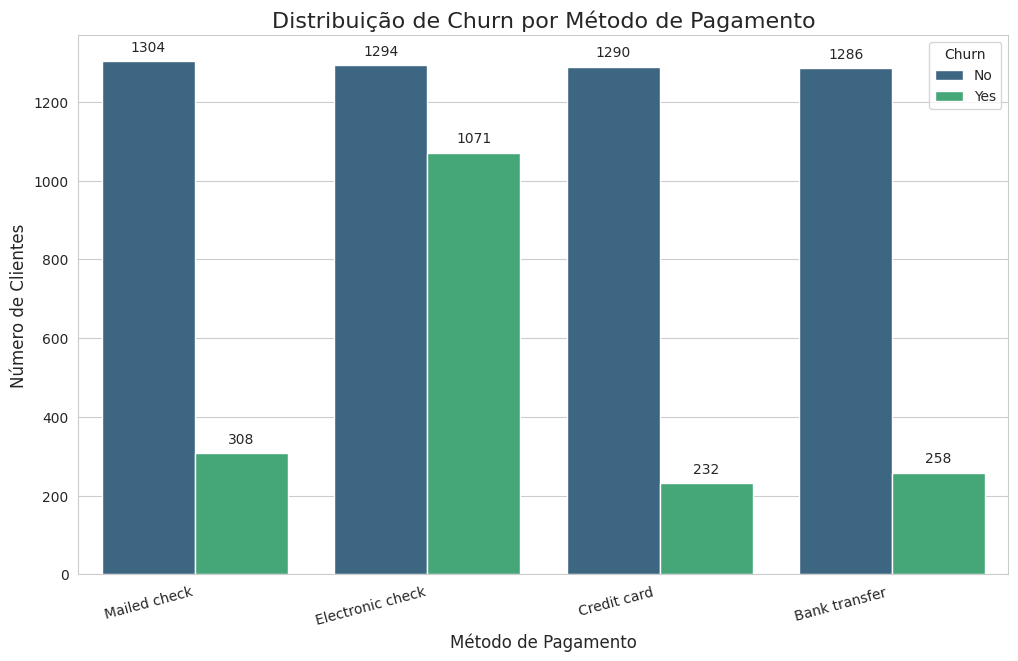

In [254]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df_final, x='PaymentMethod', hue='Churn', palette='viridis')

plt.title('Distribuição de Churn por Método de Pagamento', fontsize=16)
plt.xlabel('Método de Pagamento', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.legend(title='Churn', loc='upper right')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

plt.show()

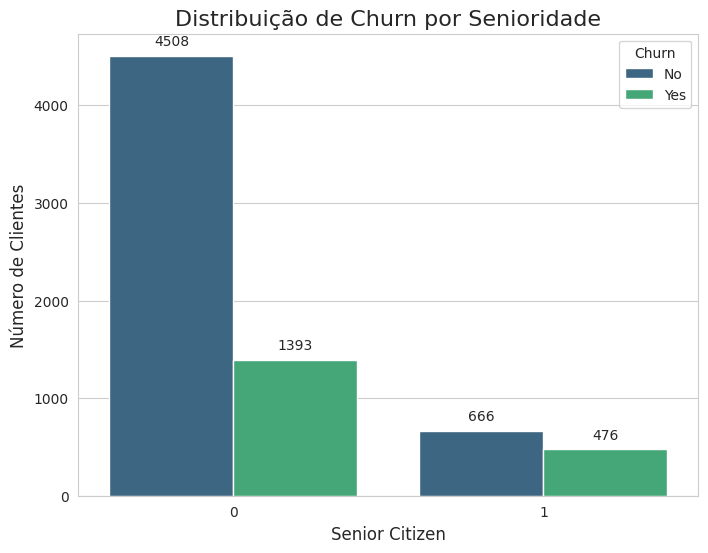

In [252]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_final, x='SeniorCitizen', hue='Churn', palette='viridis')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

plt.title('Distribuição de Churn por Senioridade', fontsize=16)
plt.xlabel('Senior Citizen', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', loc='upper right')

plt.show()

/tmp/ipython-input-194485812.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], data=df_final, x='Churn', y=var, palette='viridis')
/tmp/ipython-input-194485812.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], data=df_final, x='Churn', y=var, palette='viridis')
/tmp/ipython-input-194485812.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], data=df_final, x='Churn', y=var, palette='viridis')


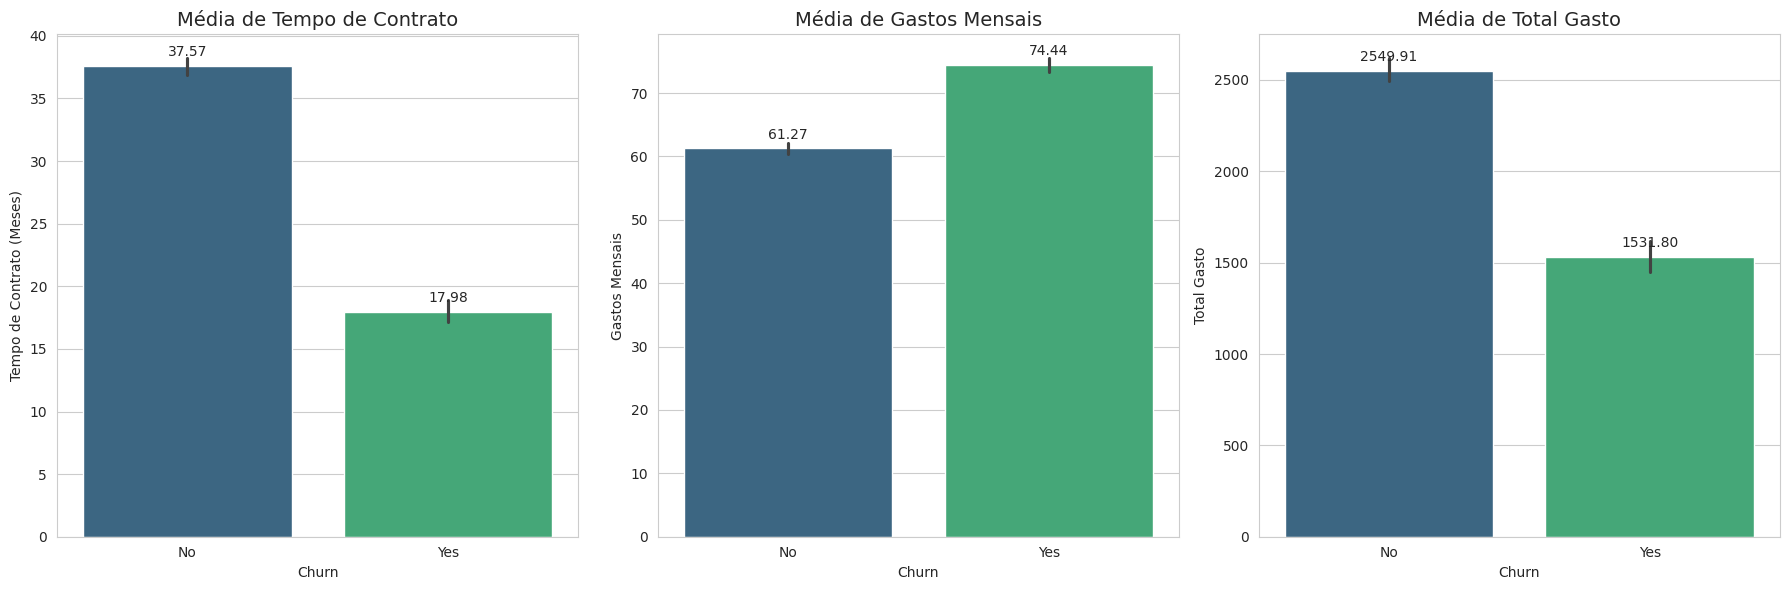

In [262]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 linha, 3 colunas

numeric_vars = ['tenure', 'Charges.Monthly', 'Charges.Total']
titles = ['Média de Tempo de Contrato', 'Média de Gastos Mensais', 'Média de Total Gasto']
y_labels = ['Tempo de Contrato (Meses)', 'Gastos Mensais', 'Total Gasto']

for i, var in enumerate(numeric_vars):
    sns.barplot(ax=axes[i], data=df_final, x='Churn', y=var, palette='viridis')

    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(y_labels[i])

    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height:.2f}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom',
                         xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

#📄Relatorio Final

---

### 📄 Análise de Evasão de Clientes (Churn)

Este relatório apresenta uma análise sobre a evasão de clientes (Churn) da empresa TelecomX, focando em entender os principais motivos que levam os clientes a cancelar seus serviços.

---

#### 🔍 **O que foi feito?**

Neste projeto, realizamos as seguintes etapas para analisar o problema de Churn:

1.  **Extração e Limpeza de Dados:** Importamos os dados de um arquivo JSON, organizamos as informações e realizamos uma limpeza rigorosa, tratando valores ausentes e corrigindo formatos de colunas. A etapa mais importante foi a remoção de 224 registros com informações de Churn incompletas para garantir a precisão da nossa análise.
2.  **Análise Exploratória:** Utilizando gráficos de barra e de distribuição, exploramos a relação entre a variável Churn e outras características dos clientes, como tipo de contrato, tempo de serviço e forma de pagamento.

---

#### 📈 **Principais Descobertas**

A análise dos dados revelou padrões muito claros sobre a evasão de clientes. Os gráficos mostraram que a decisão de sair da empresa não é aleatória e está diretamente ligada a fatores específicos:

| Fator de Risco | Perfil do Cliente propenso a Churn |
| :--- | :--- |
| **Tempo de Contrato** | Clientes com **pouco tempo de serviço** (média de **18 meses**) são os que mais saem. |
| **Tipo de Plano** | Clientes com **contratos mensais** têm uma probabilidade muito maior de cancelar o serviço. |
| **Método de Pagamento** | O uso de **cheques eletrônicos** está fortemente associado a uma maior taxa de evasão. |
| **Senioridade** | A taxa de Churn é um pouco mais alta entre clientes idosos. |

---

#### 💡 **Conclusão:** O Perfil do Cliente em Risco

Com base nos dados, podemos traçar o perfil do cliente que tem maior probabilidade de churn: é um cliente **novo**, que optou por um **plano mensal** e que realiza pagamentos via **cheque eletrônico**. Este perfil sugere uma baixa lealdade e um compromisso frágil com a empresa.

---

#### ✅ **Recomendações Estratégicas**

Para reter esses clientes de alto risco e reduzir a taxa de Churn, a TelecomX deve considerar as seguintes ações:

1.  **Foco nos Clientes Novos:**
    * Implementar um programa de boas-vindas e acompanhamento nos primeiros meses.
    * Oferecer um atendimento proativo para garantir a satisfação inicial.
2.  **Incentivar Contratos de Longo Prazo:**
    * Criar ofertas especiais e descontos atraentes para que clientes em planos mensais migrem para contratos anuais.
3.  **Melhorar a Experiência de Pagamento:**
    * Investigar a causa da insatisfação dos clientes que usam cheques eletrônicos.
    * Melhorar a usabilidade e a segurança desse método ou, alternativamente, incentivar a migração para outras formas de pagamento mais estáveis.

Essas recomendações, baseadas em evidências dos dados, podem ajudar a TelecomX a construir relacionamentos mais duradouros e lucrativos com seus clientes.